In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.datasets import reuters,mnist
import numpy as np
from tensorflow.keras.utils import to_categorical

In [76]:
# We load the data, keeping the 10000 most recurring words in the dictionary
(X_train_data, y_train_data), (X_test_data,y_test) = reuters.load_data(num_words=10000)

In [77]:
# We get the index of words
word_index = reuters.get_word_index()
# We reverse it to get the word from the index
reverse_word_index = dict([(value,key) for (key,value) in word_index.items()])
# We reverse a review
decoded_newswire = ' '.join([reverse_word_index.get(i - 3,'?') for i in X_train_data[0]])
# We show it 
print(decoded_newswire)

# Since we only took the 10000 most recurring words there are still some numbers in 

? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3


In [78]:
# We convert the labels to one-hot-encoding 
y_train_onehot = to_categorical(y_train_data)
y_test_onehot = to_categorical(y_test)

In [79]:
# Setting aside a validation set 
def vectorize_sequences(sequences, dimension = 10000):
	results = np.zeros((len(sequences),dimension))
	for i, sequence in enumerate(sequences):
		results[i, sequence] = 1
	return results


X_train = vectorize_sequences(X_train_data)
X_test = vectorize_sequences(X_test_data)

X_val = X_train[:1000]
partial_X_train = X_train[1000:]

y_val = y_train_onehot[:1000]
partial_y_train = y_train_onehot[1000:]


In [107]:
# Building a model 

model = Sequential()
model.add(Dense(128,activation='relu',input_shape = (10000,)))
model.add(Dense(64,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(46,activation='softmax'))

In [108]:
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics =['accuracy'])
model.summary()

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_61 (Dense)             (None, 128)               1280128   
_________________________________________________________________
dense_62 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_63 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_64 (Dense)             (None, 46)                2990      
Total params: 1,295,534
Trainable params: 1,295,534
Non-trainable params: 0
_________________________________________________________________


In [109]:
history = model.fit(partial_X_train,partial_y_train, epochs = 10, batch_size = 512,validation_data=(X_val,y_val))

Epoch 1/10
16/16 [==============================] - 0s 15ms/step - loss: 2.3150 - accuracy: 0.5558 - val_loss: 1.4781 - val_accuracy: 0.6810
Epoch 2/10
16/16 [==============================] - 0s 9ms/step - loss: 1.2336 - accuracy: 0.7301 - val_loss: 1.2163 - val_accuracy: 0.7370
Epoch 3/10
16/16 [==============================] - 0s 9ms/step - loss: 0.8996 - accuracy: 0.8009 - val_loss: 1.0735 - val_accuracy: 0.7740
Epoch 4/10
16/16 [==============================] - 0s 9ms/step - loss: 0.6796 - accuracy: 0.8507 - val_loss: 0.9887 - val_accuracy: 0.7880
Epoch 5/10
16/16 [==============================] - 0s 9ms/step - loss: 0.5057 - accuracy: 0.8894 - val_loss: 1.0224 - val_accuracy: 0.7800
Epoch 6/10
16/16 [==============================] - 0s 9ms/step - loss: 0.3792 - accuracy: 0.9221 - val_loss: 0.9629 - val_accuracy: 0.8000
Epoch 7/10
16/16 [==============================] - 0s 9ms/step - loss: 0.2964 - accuracy: 0.9339 - val_loss: 1.0314 - val_accuracy: 0.7850
Epoch 8/10
16/16 [=

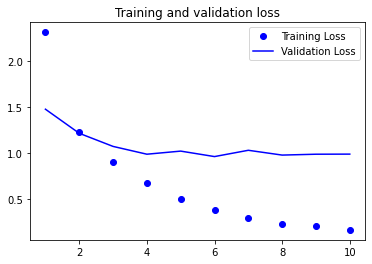

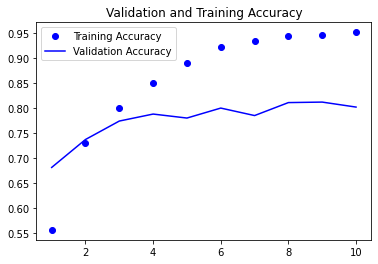

In [110]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1,len(loss)+1)

plt.plot(epochs,loss,'bo',label='Training Loss')
plt.plot(epochs,val_loss,'b',label = 'Validation Loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

plt.plot(epochs,accuracy,'bo',label='Training Accuracy')
plt.plot(epochs,val_accuracy,'b',label='Validation Accuracy')
plt.title('Validation and Training Accuracy')
plt.legend()
plt.show()

In [111]:
model.evaluate(X_test,y_test_onehot)
# 78% accuracy

71/71 [==============================] - 0s 2ms/step - loss: 1.1505 - accuracy: 0.7903


[1.1505305767059326, 0.7902938723564148]

Now we will try to tinker with the network